In [1]:
import pickle
with open('data.pkl', 'rb') as file:
    train_data = pickle.load(file)

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 59 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [4]:
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['fraud']

0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: fraud, Length: 180519, dtype: int64

In [5]:
train_data['fraud'].sum()

4062

In [6]:
train_data['late_delivery'] = np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)
train_data['late_delivery']

0         0
1         1
2         0
3         0
4         0
         ..
180514    0
180515    1
180516    1
180517    0
180518    0
Name: late_delivery, Length: 180519, dtype: int64

In [7]:
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Order Status', 'Product Image', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

In [8]:
for column in train_data.columns:
    if len(train_data[column].value_counts()) < 2:
        print(column)

Customer Email
Customer Password
Product Description
Product Status


In [9]:
train_data.drop(['Customer Email', 'Customer Password', 'Product Description', 'Product Status', \
                 'Product Image', 'Customer Lname', 'Customer Fname'], axis=1, inplace=True)

In [10]:
train_data.drop(['Order Customer Id', 'Order Item Cardprod Id', 'Order Item Id', 'Sales per customer',\
                'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id',\
                 'Product Price', 'Customer Full Name'], axis=1, inplace=True)

In [11]:
pd.set_option('display.max_columns', None)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Order Zipcode,Product Name,shipping date (DateOrders),Shipping Mode,order_year,order_month,order_week_day,order_hour,order_month_year,fraud,late_delivery
0,DEBIT,3,4,91.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,13.110000,0.04,327.750000,0.29,1,327.750000,Southeast Asia,Java Occidental,COMPLETE,NaN,Smart watch,2/3/2018 22:56,Standard Class,2018,1,2,22,2018-01,0,0
1,TRANSFER,5,4,-249.089996,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,South Asia,Rajastán,PENDING,NaN,Smart watch,1/18/2018 12:27,Standard Class,2018,1,5,12,2018-01,0,1
2,CASH,4,4,-247.779999,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,South Asia,Rajastán,CLOSED,NaN,Smart watch,1/17/2018 12:06,Standard Class,2018,1,5,12,2018-01,0,0
3,DEBIT,3,4,22.860001,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,75937,22.940001,0.07,327.750000,0.08,1,327.750000,Oceania,Queensland,COMPLETE,NaN,Smart watch,1/16/2018 11:45,Standard Class,2018,1,5,11,2018-01,0,0
4,PAYMENT,2,4,134.210007,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,75936,29.500000,0.09,327.750000,0.45,1,327.750000,Oceania,Queensland,PENDING_PAYMENT,NaN,Smart watch,1/15/2018 11:24,Standard Class,2018,1,5,11,2018-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,1005,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,2016-01-16 03:40:00,26043,0.000000,0.00,399.980011,0.10,1,399.980011,Eastern Asia,Shanghái,CLOSED,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class,2016,1,5,3,2016-01,0,0
180515,DEBIT,3,2,-613.770019,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,9141,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,2016-01-16 01:34:00,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,Eastern Asia,Osaka,COMPLETE,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class,2016,1,5,1,2016-01,0,1
180516,TRANSFER,5,4,141.110001,Late delivery,1,45,Fishing,Bristol,EE. UU.,291,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,2016-01-15 21:00:00,26024,8.000000,0.02,399.980011,0.36,1,399.980011,Oceania,Australia del Sur,PENDING,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class,2016,1,4,21,2016-01,0,1
180517,PAYMENT,3,4,186.229996,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,2813,Consumer,PR,2585 Silent Autumn Landing,725.0,7,Fan Shop,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,2016-01-15 20

In [12]:
train_data.drop(['Order Zipcode', 'Latitude', 'Longitude', 'shipping date (DateOrders)', \
                'Customer Street', 'order date (DateOrders)', 'order_month_year', 'Order Status',\
                 'Delivery Status', 'Late_delivery_risk'], axis=1, inplace=True)

In [13]:
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Product Name', 'Shipping Mode'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for cat in categorical_cols:
    train_data[cat] = le.fit_transform(train_data[cat])

In [15]:
train_data[categorical_cols]

,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Product Name,Shipping Mode
0,1,40,66,1,0,36,4,3,331,70,15,475,78,3
1,3,40,66,1,0,36,4,3,391,69,13,841,78,3
2,0,40,452,0,0,5,4,3,391,69,13,841,78,3
3,1,40,285,0,2,5,4,3,3226,8,11,835,78,3
4,2,40,66,1,1,36,4,3,3226,8,11,835,78,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,18,59,0,2,31,3,3,2922,31,7,913,24,3
180515,1,18,26,0,1,5,3,3,1362,77,7,770,24,2
180516,3,18,55,0,1,7,3,3,25,8,11,88,24,3
180517,2,18,66,1,0,36,3,3,25,8,11,88,24,3


In [16]:
numerical_columns = train_data.columns.to_list()
for e in categorical_cols:
    numerical_columns.remove(e)
numerical_columns

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'order_year',
 'order_month',
 'order_week_day',
 'order_hour',
 'fraud',
 'late_delivery']

In [17]:
train_data[numerical_columns]

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Customer Id,Customer Zipcode,Department Id,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,order_year,order_month,order_week_day,order_hour,fraud,late_delivery
0,3,4,91.250000,73,20755,725.0,2,77202,13.110000,0.04,327.750000,0.29,1,327.750000,2018,1,2,22,0,0
1,5,4,-249.089996,73,19492,725.0,2,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,2018,1,5,12,0,1
2,4,4,-247.779999,73,19491,95125.0,2,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,2018,1,5,12,0,0
3,3,4,22.860001,73,19490,90027.0,2,75937,22.940001,0.07,327.750000,0.08,1,327.750000,2018,1,5,11,0,0
4,2,4,134.210007,73,19489,725.0,2,75936,29.500000,0.09,327.750000,0.45,1,327.750000,2018,1,5,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,45,1005,11207.0,7,26043,0.000000,0.00,399.980011,0.10,1,399.980011,2016,1,5,3,0,0
180515,3,2,-613.770019,45,9141,93304.0,7,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,2016,1,5,1,0,1
180516,5,4,141.110001,45,291,6010.0,7,26024,8.000000,0.02,399.980011,0.36,1,399.980011,2016,1,4,21,0,1
180517,3,4,186.229996,45,2813,725.0,7,26022,12.000000,0.03,399.980011,0.48,1,399.980011,2016,1,4,20,0,0


In [18]:
# 数据集切分
x_fraud = train_data.loc[:, train_data.columns != 'fraud']
y_fraud = train_data['fraud']

x_late = train_data.loc[:, train_data.columns != 'late_delivery']
y_late = train_data['late_delivery']

In [19]:
from sklearn.model_selection import train_test_split

x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test = train_test_split(x_fraud, y_fraud, test_size = 0.2)
x_late_train, x_late_test, y_late_train, y_late_test = train_test_split(x_late, y_late, test_size = 0.2)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_fraud_train = sc.fit_transform(x_fraud_train)
x_fraud_test = sc.transform(x_fraud_test)

x_late_train = sc.fit_transform(x_late_train)
x_late_test = sc.transform(x_late_test)

In [21]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, confusion_matrix
def model_stats(model, x_train, x_test, y_train, y_test, name='Fraud'):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    auc = roc_auc_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    cf = confusion_matrix(y_pred, y_test)
    print("Model Used: ", model)
    print('{} Accuracy: {}%'.format(name, accuracy * 100))
    print('{} Recall: {}%'.format(name, recall * 100))
    print('{} AUC: {}%'.format(name, auc * 100))
    print('{} F1: {}%'.format(name, f1 * 100))
    print('{} Confusion Matrix:\n{}%'.format(name, cf))


In [22]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model_fraud = XGBClassifier()
model_late = XGBClassifier()

model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model Used:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Fraud Accuracy: 99.03611788167515%
Fraud Recall: 91.57509157509158%
Fraud AUC: 95.36288748280423%
Fraud F1: 74.1839762611276%
Fraud Confusion Matrix:
[[35256   302]
 [   46   500]]%
Model Used:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance

([<matplotlib.axis.XTick at 0x7f91d8b3a150>,
 <a list of 33 Text xticklabel objects>)

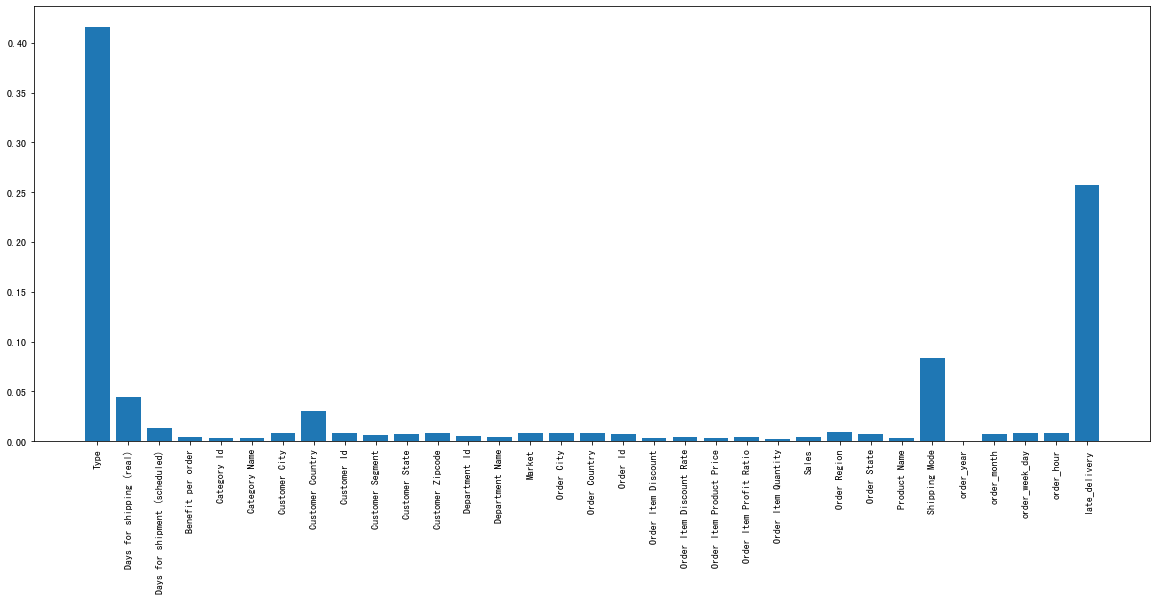

In [23]:
import matplotlib.pyplot as plt

feature_name = list(train_data.columns)
feature_name.remove('fraud')
plt.figure(figsize=(20, 8))
plt.bar(np.arange(33), model_fraud.feature_importances_)
plt.xticks(list(np.arange(33)), feature_name, rotation='vertical')

([<matplotlib.axis.XTick at 0x7f91d81a0990>,
 <a list of 33 Text xticklabel objects>)

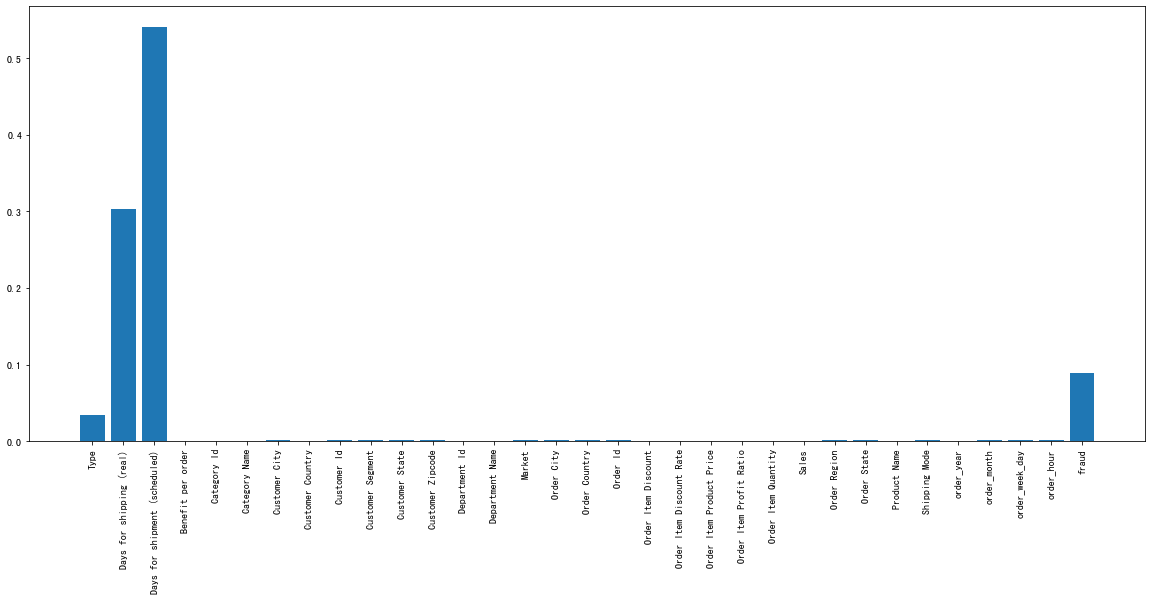

In [24]:
feature_name = list(train_data.columns)
feature_name.remove('late_delivery')
plt.figure(figsize=(20, 8))
plt.bar(np.arange(33), model_late.feature_importances_)
plt.xticks(list(np.arange(33)), feature_name, rotation='vertical')

In [41]:
temp1 = train_data.drop(['Order Item Quantity'], axis=1)
x_sales = temp1.loc[:, temp1.columns != 'Sales']
y_sales = temp1['Sales']
x_sales_train, x_sales_test, y_sales_train, y_sales_test = train_test_split(x_sales, y_sales, test_size = 0.2)

temp2 = train_data.drop(['Sales'], axis=1)
x_order_quantity = temp2.loc[:, temp2.columns != 'Order Item Quantity']
y_order_quantity = temp2['Order Item Quantity']
x_order_quantity_train, x_order_quantity_test, y_order_quantity_train, y_order_quantity_test = train_test_split(x_order_quantity, y_order_quantity, test_size = 0.2)

In [42]:
from sklearn.metrics import mean_squared_error

def model_stats_2(model, x_train, x_test, y_train, y_test, name='Sales'):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Model Used: ", model)
    print("{} predict mean square error: {}".format(name, mean_squared_error(y_pred, y_test)))

In [43]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

model = Lasso()
model_stats_2(model, x_sales_train, x_sales_test, y_sales_train, y_sales_test, name='Sales')

model = DecisionTreeRegressor()
model_stats_2(model, x_sales_train, x_sales_test, y_sales_train, y_sales_test, name='Sales')



model = Lasso()
model_stats_2(model, x_order_quantity_train, x_order_quantity_test, y_order_quantity_train, y_order_quantity_test,\
              name='Order Item Quantity')
model = DecisionTreeRegressor()
model_stats_2(model, x_order_quantity_train, x_order_quantity_test, y_order_quantity_train, y_order_quantity_test,\
              name='Order Item Quantity')

Model Used:  Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Sales predict mean square error: 3763.6716059306063
Model Used:  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Sales predict mean square error: 52.943305003612785
Model Used:  Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Order Item Quantity predict mean square error: 1.3472365197109

In [44]:
xgb_model_sales = XGBRegressor()
model_stats_2(xgb_model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, name='Sales')

Model Used:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Sales predict mean square error: 35.11889044109941


([<matplotlib.axis.XTick at 0x7f91bc15a110>,
 <a list of 32 Text xticklabel objects>)

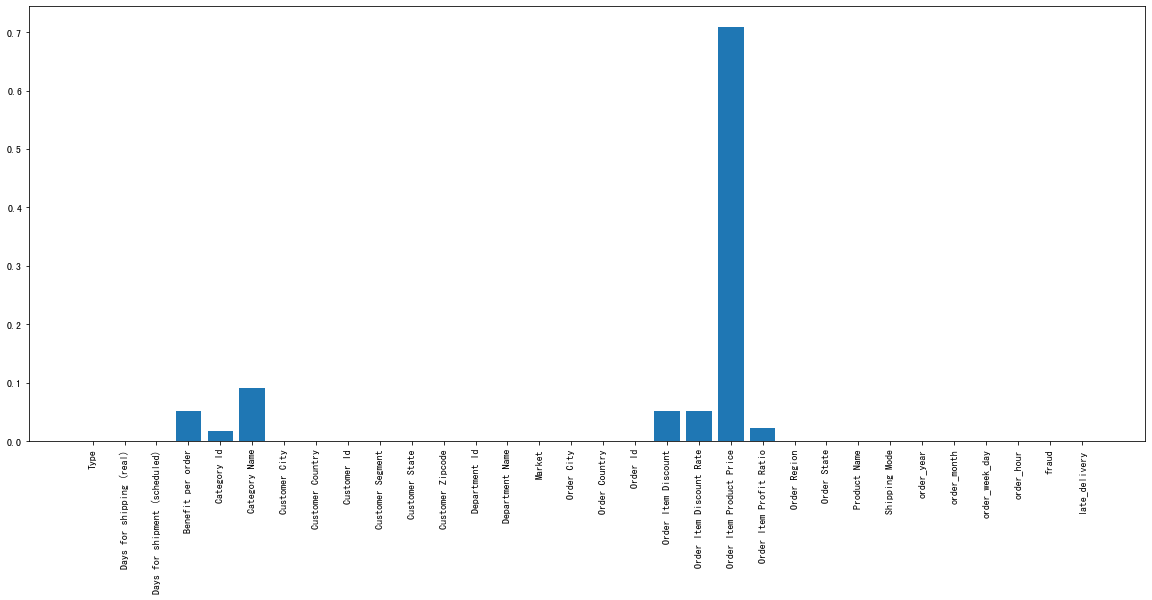

In [51]:
feature_name = list(x_sales.columns)
plt.figure(figsize=(20, 8))
plt.bar(np.arange(32), xgb_model_sales.feature_importances_)
plt.xticks(list(np.arange(32)), feature_name, rotation='vertical')


In [49]:
xgb_model_quantitiy = XGBRegressor()
model_stats_2(xgb_model_late, x_order_quantity_train, x_order_quantity_test, y_order_quantity_train, y_order_quantity_test,\
              name='Order Item Quantity')

Model Used:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Order Item Quantity predict mean square error: 0.013602813247717548


In [52]:
feature_name = list(x_order_quantity.columns)

plt.figure(figsize=(20, 8))
plt.bar(np.arange(32), xgb_model_quantitiy.feature_importances_)
plt.xticks(list(np.arange(32)), feature_name, rotation='vertical')


AttributeError: Feature importance is not defined for Booster type None

<Figure size 1440x576 with 0 Axes>